In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas
import numpy
import os,sys,re,glob

# should be 3.1.1:
matplotlib.__version__
%matplotlib notebook
#plt.rcParams['figure.figsize'] = [10, 10]

In [2]:
joinData = {}
for yearInt in range(2014,2017):
    joinData[yearInt] = pandas.read_csv('FullJoin'+str(yearInt)+'.csv')

In [3]:
joinData[2014].columns

Index(['year_x', 'area', 'zip_code', 'moisture', 'kernel_weight',
       'actual_wheat_ash', 'falling_no', 'protein_12', 'ZIP', 'COUNTY',
       'TOT_RATIO', 'adm2_code', 'year_y', 'date', 'doy', 'met_avg_t',
       'met_gdd', 'met_max_rh', 'met_max_t', 'met_max_vpd', 'met_min_rh',
       'met_min_t', 'met_p_mm', 'met_sh', 'met_sr_wm2', 'FIPScounty'],
      dtype='object')

In [4]:
n_bins = 50

***
## Moisture
### From the moisture content, 2014 winter wheat was clearly too high moisture with more than 60% of the wheat outside of the 10-12% moisture limits suggested by Wikipedia

https://en.wikipedia.org/wiki/Grain_quality

2014 percent of wheat within 10-12% : 37.00498280421779
2015 percent of wheat within 10-12% : 64.00004184581908
2016 percent of wheat within 10-12% : 72.89390541716439


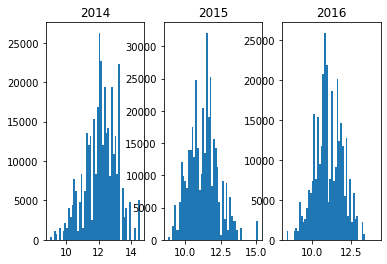

In [5]:
#figure(num=1, figsize=(10, 6))
fig, ax = plt.subplots(1,3)

_counter = 0
for yearInt in range(2014,2017):
    ax[_counter].hist(joinData[yearInt].moisture, n_bins)
    ax[_counter].set_title(str(yearInt))

    # determine percentage of wheat within 10-12% interval
    joinData[yearInt]['optimalMoist'] = numpy.where((joinData[yearInt].moisture < 12) &\
                                                 (joinData[yearInt].moisture > 10),1,0)

    print(str(yearInt)+' percent of wheat within 10-12% : '\
          +str(100*joinData[yearInt].optimalMoist.sum()/len(joinData[yearInt])))
    _counter += 1

***
## Kernel weight

2014 mean kernel_weight : 29.91269570843217
2015 mean kernel_weight : 27.636730056497107
2016 mean kernel_weight : 31.54455970658252


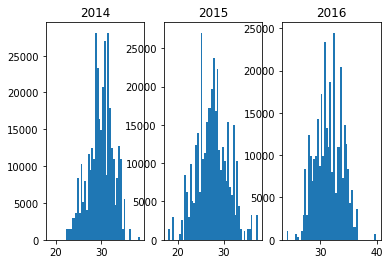

In [6]:
fig, ax = plt.subplots(1,3)

_counter = 0
for yearInt in range(2014,2017):
    ax[_counter].hist(joinData[yearInt].kernel_weight, n_bins)
    ax[_counter].set_title(str(yearInt))

    print(str(yearInt)+' mean kernel_weight : '\
          +str(joinData[yearInt].kernel_weight.mean()))
    _counter += 1

***
## Wheat ash

2014 mean actual_wheat_ash : 0.04633138116749714
2015 mean actual_wheat_ash : 0.04889091914053132
2016 mean actual_wheat_ash : 0.04758635614493075


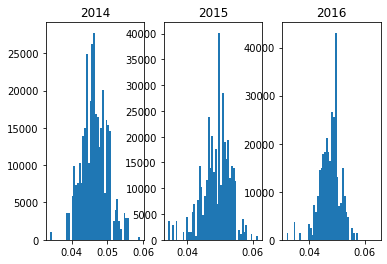

In [7]:
fig, ax = plt.subplots(1,3)

_counter = 0
for yearInt in range(2014,2017):
    ax[_counter].hist(joinData[yearInt].actual_wheat_ash, n_bins)
    ax[_counter].set_title(str(yearInt))
    
    print(str(yearInt)+' mean actual_wheat_ash : '\
            +str(joinData[yearInt].actual_wheat_ash.mean()))

    _counter += 1

***
## Protein_12
### Should be high for high quality wheat
https://www.ndsu.edu/faculty/simsek/wheat/flour.html

2014 mean protein_12 : 13.691370005219088
2015 mean protein_12 : 12.30277877360523
2016 mean protein_12 : 11.26991207633003


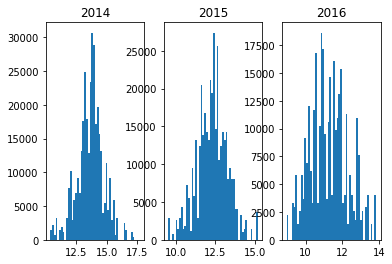

In [8]:
fig, ax = plt.subplots(1,3)

_counter = 0
for yearInt in range(2014,2017):
    ax[_counter].hist(joinData[yearInt].protein_12, n_bins)
    ax[_counter].set_title(str(yearInt))
    
    print(str(yearInt)+' mean protein_12 : '\
            +str(joinData[yearInt].protein_12.mean()))

    _counter += 1

***
## Falling Number

### Falling number is measurement of viscosity reduction over time due to $\alpha$-amylase activity from a sample of wheat starch paste. Higher falling numbers indicate a longer time to fall, which indicates higher quality seeds. 

- From Kweon (USDA)

2014 mean falling_no : 366.97195044436626
2014 percent of wheat above falling_no 200: 99.998297447306
2015 mean falling_no : 394.53432297942834
2015 percent of wheat above falling_no 200: 100.0
2016 mean falling_no : 381.1954079172087
2016 percent of wheat above falling_no 200: 99.99968811305278


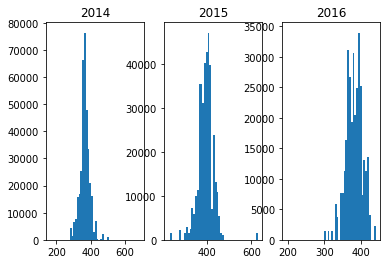

In [9]:
fig, ax = plt.subplots(1,3)

_counter = 0
for yearInt in range(2014,2017):
    ax[_counter].hist(joinData[yearInt].falling_no, n_bins)
    ax[_counter].set_title(str(yearInt))
    
    print(str(yearInt)+' mean falling_no : '\
            +str(joinData[yearInt].falling_no.mean()))

    
    # determine percentage of wheat above falling number of 200
    joinData[yearInt]['highFalling'] = numpy.where((joinData[yearInt].falling_no < 200),0,1)

    print(str(yearInt)+' percent of wheat above falling_no 200: '\
          +str(100*joinData[yearInt].highFalling.sum()/len(joinData[yearInt])))
    _counter += 1